<a href="https://colab.research.google.com/github/leoxiang66/machine-learning/blob/MLO/homework/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch
from torch.nn.parameter import Parameter
from torch.distributions.normal import Normal
from torch.distributions.uniform import Uniform

In [2]:
uniform_dist = Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
X = uniform_dist.sample(torch.Size([1000]))
epsilon = Normal(0,0.5)

In [3]:
epsilon.sample()

tensor(0.2409)

In [4]:
X.size()

torch.Size([1000, 1])

In [5]:
X[0]

tensor([0.9588])

In [6]:
Y = torch.tensor([[x+epsilon.sample()] for x in X])
Y.size()

torch.Size([1000, 1])

In [7]:
Y[0]

tensor([0.8350])

# P4.1

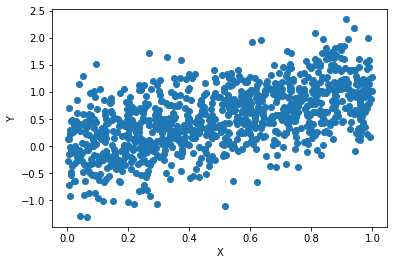

In [8]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# P4.2

## Training

This code section is just for a comparison with the grouth truth LS solution

In [9]:
import torch
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize,bias = False)

    def forward(self, x):
        out = self.linear(x)
        return out

In [10]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 100

lr = linearRegression(inputDim, outputDim)

In [11]:
lr(X[:2])

tensor([[0.6314],
        [0.5802]], grad_fn=<MmBackward0>)

In [12]:
loss_fn = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(lr.parameters(), lr=learningRate)

In [13]:
for i in range(1,1001):
    outputs = lr(X)
    optimizer.zero_grad()

    loss = loss_fn(outputs,Y)

    if i%100 == 0:
        print(f'Loss at {i} epoch: {loss.item()}')

    loss.backward()
    optimizer.step()

Loss at 100 epoch: 0.227300226688385
Loss at 200 epoch: 0.22729991376399994
Loss at 300 epoch: 0.22729989886283875
Loss at 400 epoch: 0.22729989886283875
Loss at 500 epoch: 0.22729989886283875
Loss at 600 epoch: 0.22729989886283875
Loss at 700 epoch: 0.22729989886283875
Loss at 800 epoch: 0.22729989886283875
Loss at 900 epoch: 0.22729992866516113
Loss at 1000 epoch: 0.22729992866516113


In [14]:
Y_hat = lr(X)

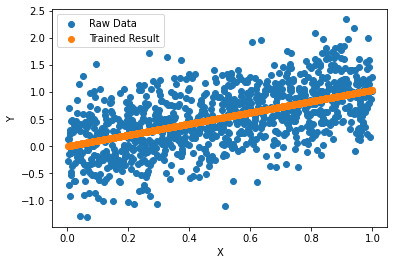

In [15]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y, label = 'Raw Data')
plt.scatter(x=X,y=Y_hat.detach().numpy(),label = 'Trained Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## LSE solution

In [16]:
lse_lr = linearRegression(1,1)


In [17]:
for i in lse_lr.linear.parameters():
    print(i)

Parameter containing:
tensor([[0.8064]], requires_grad=True)


In [18]:
(X.T).size()

torch.Size([1, 1000])

In [19]:
def compute_lse(X,y):
    tmp = torch.matmul(X.T, X)
    tmp = torch.inverse(tmp)
    tmp = torch.matmul(tmp,X.T)
    tmp = torch.matmul(tmp,y)

    return tmp

In [20]:
lse = compute_lse(X,Y)
lse

tensor([[1.0377]])

In [21]:
lse_lr.linear.weight = torch.nn.Parameter(lse) 

In [22]:
Y_lse = lse_lr(X)

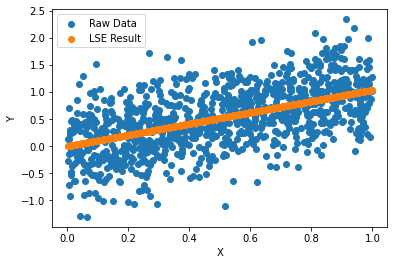

In [23]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y, label = 'Raw Data')
plt.scatter(x=X,y=Y_lse.detach().numpy(),label = 'LSE Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Training Error

In [24]:
loss_fn(Y_hat, Y_lse).item()

4.2726767761867845e-14

# P 4.4

In [25]:
xi = Normal(0,0.1)

In [26]:
Y = torch.tensor([[30*torch.square(x-0.25)*torch.square(x-0.75) + xi.sample()] for x in X])
Y.size()

torch.Size([1000, 1])

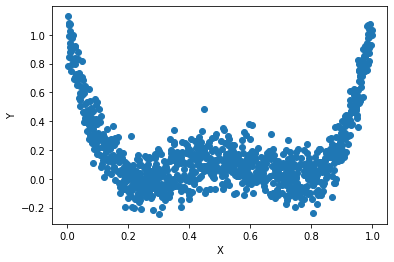

In [27]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**First we build the new $X$ matrix which is the polynomial form of $X$**

In [28]:
def pd(x, dim: int):
    result = [1]
    for i in range(dim):
        result.append(torch.pow(x,(i+1)))
    return torch.Tensor(result)


In [29]:
pd(X[0][0],4)

tensor([1.0000, 0.9588, 0.9193, 0.8814, 0.8451])

In [30]:
tmp = [pd(x[0],4) for x in X]

In [31]:
X_new = torch.stack(tmp, dim = 0)
X_new.size()

torch.Size([1000, 5])

**After we have the new $X$, we can compute the LSE solution.**

In [32]:
lse = compute_lse(X_new,Y)
lse

tensor([[  1.0479],
        [-11.2655],
        [ 41.6800],
        [-60.9429],
        [ 30.5437]])

**To plot the LSE result, we generate $Y$ using the LSE solution**

In [33]:
def forward(X, param):
    tmp = [pd(x[0],4) for x in X]
    X_new = torch.stack(tmp, dim = 0)
    return torch.matmul(X_new,param)

In [34]:
Y_lse = forward(X,lse)
Y_lse.size()

torch.Size([1000, 1])

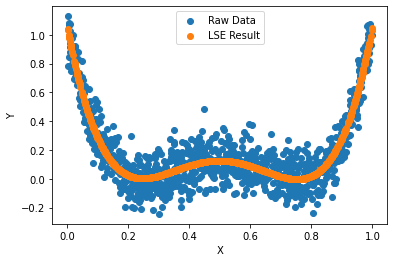

In [35]:
from matplotlib import pyplot as plt
plt.scatter(x=X,y=Y, label = 'Raw Data')
plt.scatter(x=X,y=Y_lse.detach().numpy(),label = 'LSE Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()